In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('fer2013/fer2013/fer2013.csv')

In [5]:
df.shape

(35887, 3)

In [7]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [9]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [11]:
df['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

In [12]:
df['Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

<AxesSubplot: xlabel='emotion', ylabel='Usage'>

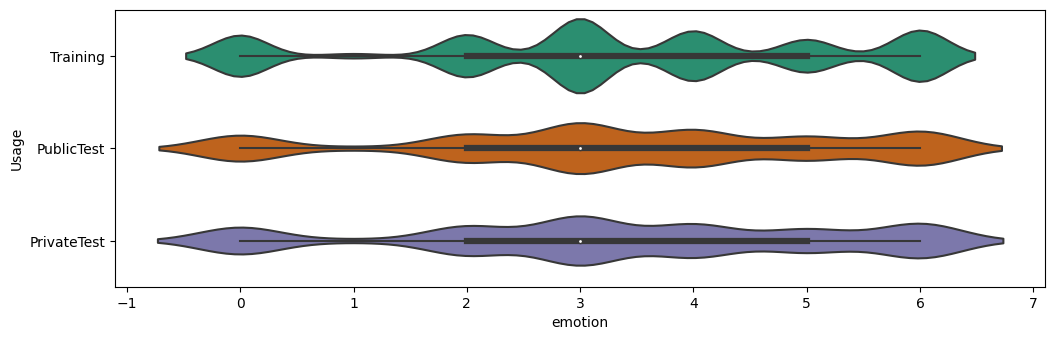

In [15]:
figsize = (12, 1.2 * len(df['Usage'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='emotion', y='Usage', inner='box', palette='Dark2')

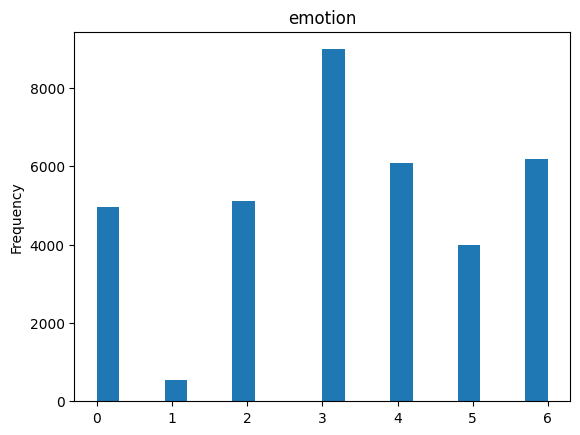

In [16]:
df['emotion'].plot(kind='hist', bins=20, title='emotion')
plt.show()

In [17]:
emotion_label= {0:'anger',1:'disgust',2:'fear',3:'happiness',4:'sadness',5:'surprise',6:'neutral'}
emotion_label

{0: 'anger',
 1: 'disgust',
 2: 'fear',
 3: 'happiness',
 4: 'sadness',
 5: 'surprise',
 6: 'neutral'}

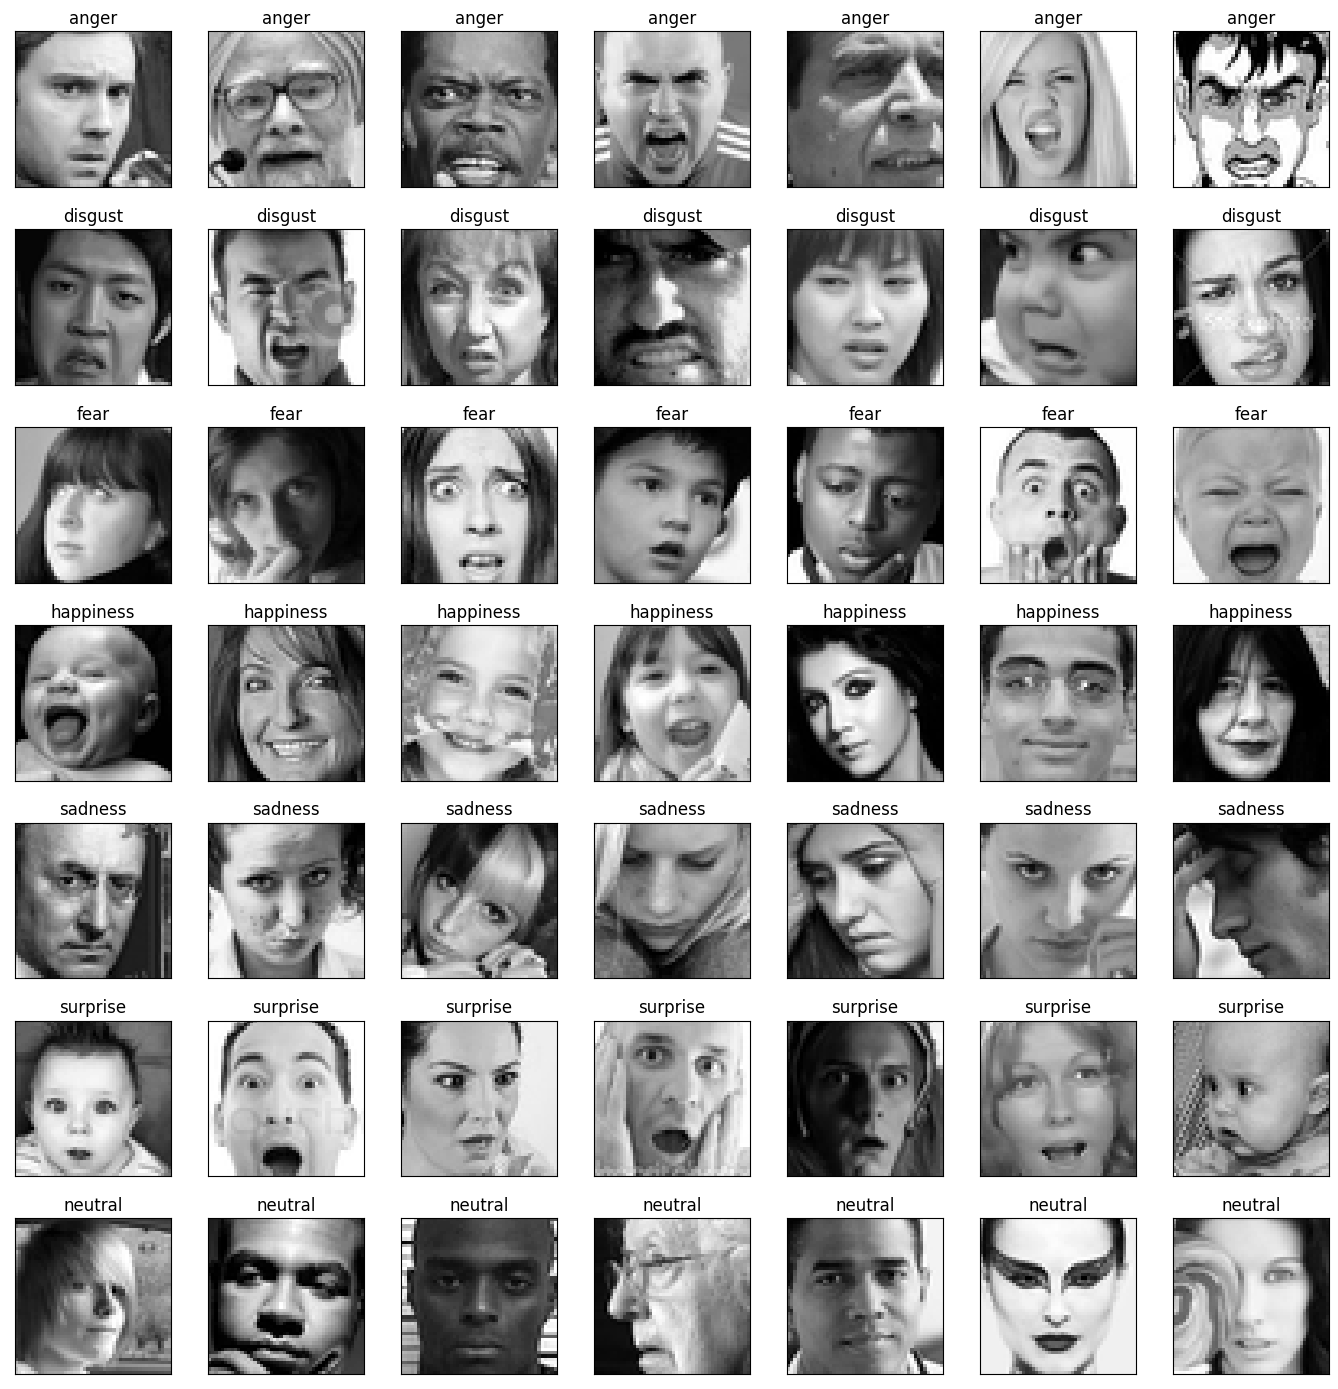

In [18]:
fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        # reshaped to a 48x48 matrix and cast to float32.
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label [label])
        plt.tight_layout()

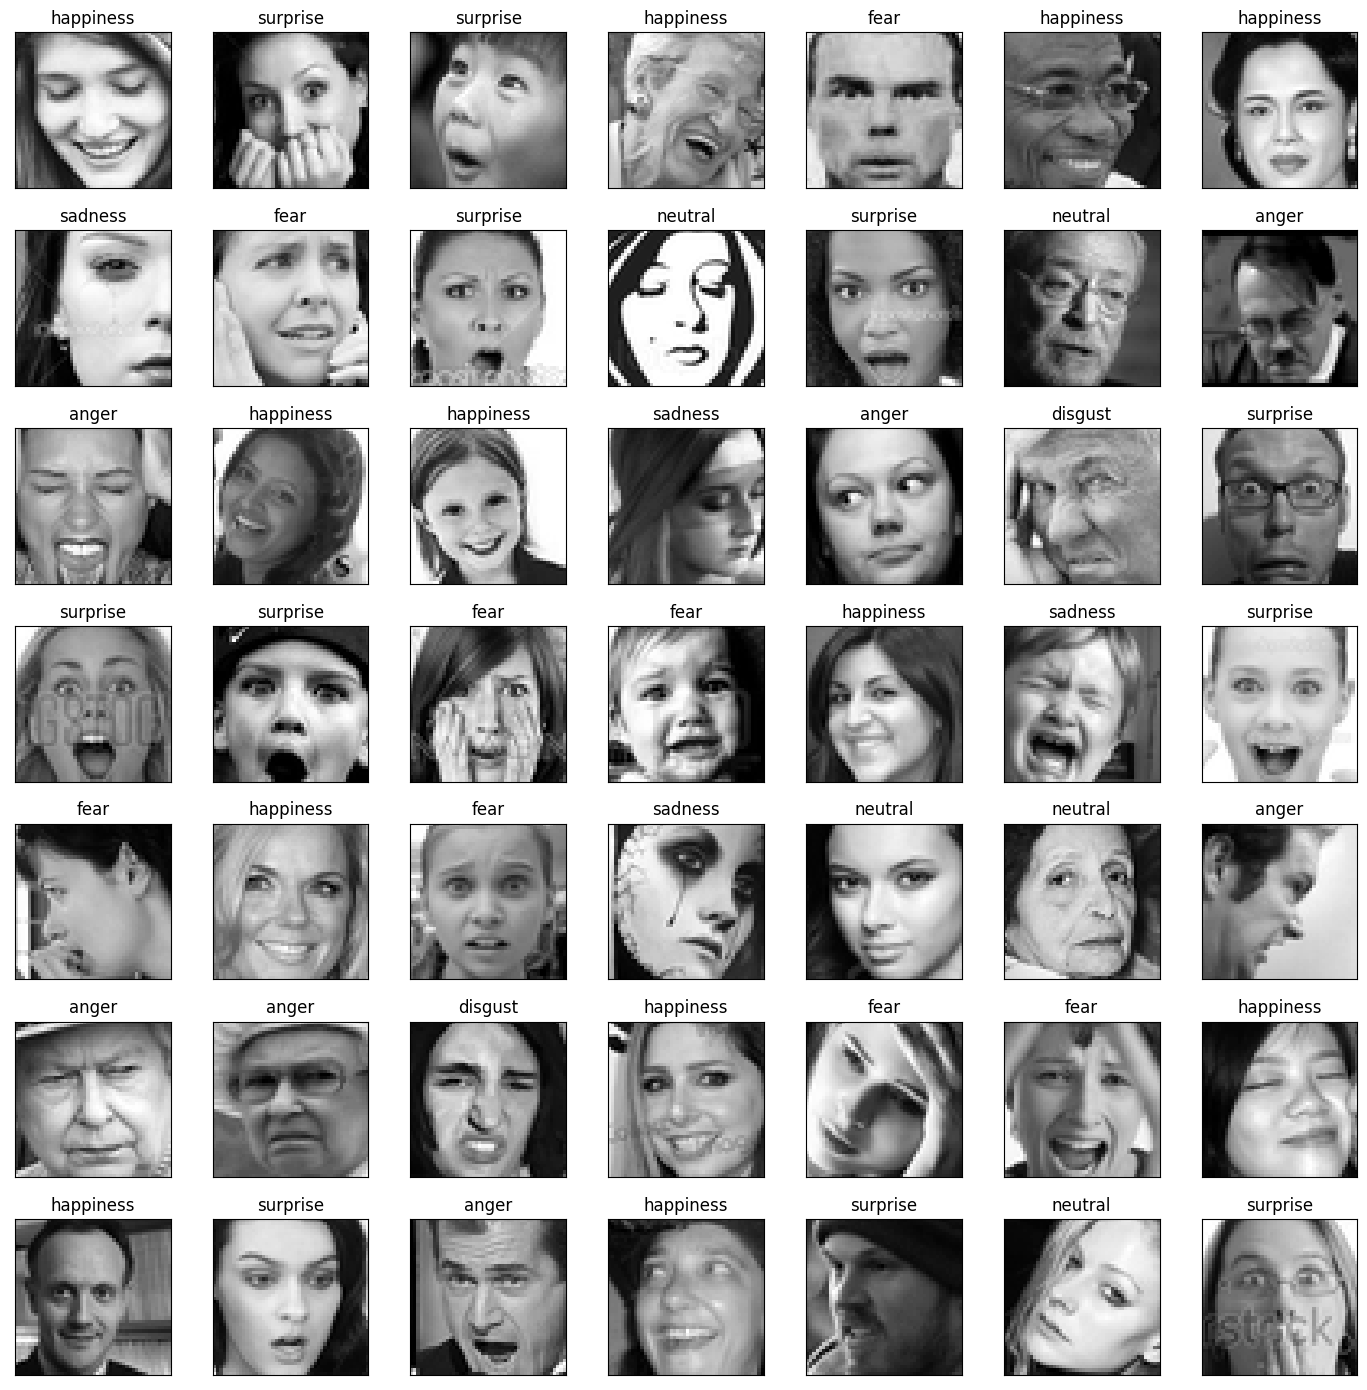

In [19]:
import random

# Assuming df is your DataFrame containing the pixel values and emotion labels

fig = plt.figure(1, (14, 14))
num_rows, num_cols = 7, 7  # You can adjust the number of rows and columns as per your preference

# Shuffle the DataFrame indices randomly
random_indices = random.sample(range(len(df)), num_rows * num_cols)

for i, index in enumerate(random_indices):
    label = df.iloc[index]['emotion']
    px = np.array(df.iloc[index]['pixels'].split(' ')).reshape(48, 48).astype('float32')

    ax = plt.subplot(num_rows, num_cols, i + 1)
    ax.imshow(px, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(emotion_label[label])

plt.tight_layout()
plt.show()